# Dataset Overview

The dataset used in this project is the **Fake and Real News Dataset** by Clément Bisaillon, publicly available on [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset).

It contains approximately **44,000 news articles** split across two files:

- **Fake.csv** — articles collected from unreliable and flagged sources, largely from the 2016–2017 US political news cycle
- **True.csv** — verified real articles sourced directly from Reuters

Each article contains four columns — `title`, `text`, `subject`, and `date`.

The dataset is well-balanced between fake and real articles, making it well suited for binary classification without needing to handle significant class imbalance.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Loading data--
fake = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Logistic_Regression\Fake_news_detection\Fake.csv')
true = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Logistic_Regression\Fake_news_detection\True.csv")

In [47]:
# Adding labels for true vs. fake news
fake['label'] = 0
true['label'] = 1
# Concatinating both the datasets--
data = pd.concat([fake,true],ignore_index=True)


In [48]:
# shuffling data
data_shuffled = data.sample(frac=1,random_state=42).reset_index(drop=True)
data_shuffled.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [49]:
# cleaning the text column of the data--
import string
import re

def clean_text(text):
    text = text.lower()     # lower 
    text = re.sub(r'\d+', '', text)     # remove digits
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)    # remove punctuations
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # remove URL
    text = re.sub(r'\s+', ' ', text)    # remove white space 
    return text

In [50]:
data_shuffled['text'] = data_shuffled['text'].apply(clean_text)

data_shuffled.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,st century wire says ben stein reputable profe...,US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,washington reuters us president donald trump r...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,on monday donald trump once again embarrassed ...,News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,glasgow scotland reuters most us presidential ...,politicsNews,"June 24, 2016",1


In [51]:
# TF-IDF Vectorization in order to vectorize the words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

text_tfidf = tfidf.fit_transform(data_shuffled['text'])
print(text_tfidf.shape)


(44898, 5000)


In [52]:
# Defining the feature and target--
X = text_tfidf
y = data_shuffled['label']

In [53]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [55]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
prediction = log_reg.predict(X_test)

In [57]:
# Evalustion of the model-
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

print(f"Accuracy of the model is: {accuracy_score(y_test,prediction):.4f}")

Accuracy of the model is: 0.9843


In [58]:
print("Confusion Matirix: ")
print(confusion_matrix(y_test,prediction))

Confusion Matirix: 
[[6936  129]
 [  83 6322]]


In [59]:
print("The classification report:")
print(classification_report(y_test,prediction))

The classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7065
           1       0.98      0.99      0.98      6405

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



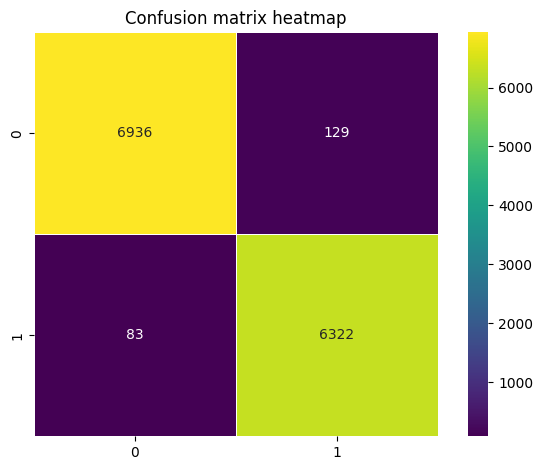

In [60]:
# Visualizing confusion matrix using a heatmap--
plt.figure()
sns.heatmap(
    confusion_matrix(y_test,prediction),
    annot=True,
    fmt='d',
    cmap='viridis',
    square=True,
    linewidth=0.5
)
plt.title("Confusion matrix heatmap")
plt.tight_layout()
plt.show()

In [61]:
# Creating a function to predict fake or real news--
def true_fake():
    text = input("Enter the news article: ")
    text_clean = clean_text(text)
    text_tfidf =  tfidf.transform([text_clean])
    text_prediction = log_reg.predict(text_tfidf)
    if text_prediction == 0:
        print("Fake News")
    else:
        print("Real News")
    

In [ ]:
true_fake()

In [66]:
# Performing Cross Validation--
from sklearn.model_selection import cross_val_score

scores_log_reg = cross_val_score(log_reg,X,y,cv=5,scoring='accuracy')
scores_log_reg

array([0.98719376, 0.98808463, 0.98518931, 0.98763782, 0.98451943])

In [67]:
av_score_cv = np.mean(scores_log_reg)
av_score_cv

np.float64(0.9865249923664992)

In [68]:
std_score_cv = np.std(scores_log_reg)
std_score_cv

np.float64(0.0014088600772945922)

# Limitations

While the model achieves **98.65% mean accuracy across 5-fold cross validation with a standard deviation of 0.0014**, it has some notable limitations worth acknowledging:

- **Dataset scope** — the model was trained on 2016–2017 US political news specifically. Performance may drop on news from different topics, domains, or time periods.
- **Style over substance** — the model learned the writing style of reliable vs unreliable sources rather than truly understanding what makes news fake or real. A professionally written fake article could potentially fool it.
- **No contextual understanding** — TF-IDF only counts word frequencies. It has no understanding of meaning, context, or sarcasm. More advanced approaches like transformer-based models (e.g. BERT) would handle these cases better.
- **Sensational real news** — dramatic but factual events can be misclassified as fake because their language resembles the style the model associates with misinformation.

These limitations are expected given the scope of this project. Addressing them would require more sophisticated NLP techniques beyond logistic regression.